In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
json_data = []

with open("final.json", "r") as f:
    json_data = json.loads(f.read())

for instance in json_data:
    instance["labels_count"] = len(instance["data"])

json_data[:2]

[{'chart_type': 'bar',
  'chart_title': 'Blood types in Albania',
  'data': [{'label': 'O+',
    'value': 1048431,
    'color': 'rgba(255, 99, 132, 0.2)'},
   {'label': 'Others', 'value': 2026148, 'color': 'rgba(255, 99, 132, 0.2)'}],
  'labels_count': 2},
 {'chart_type': 'pie',
  'chart_title': 'Blood types in Algeria',
  'data': [{'label': 'O+',
    'value': 17430676,
    'color': 'rgba(255, 99, 132, 0.2)'},
   {'label': 'Others', 'value': 26146015, 'color': 'rgba(255, 99, 132, 0.2)'}],
  'labels_count': 2}]

In [12]:
data = pd.json_normalize(
    json_data, 
    meta=["chart_type", "chart_title", "labels_count"],
)

In [13]:
data[:2]

,chart_type,chart_title,data,labels_count
0,bar,Blood types in Albania,"[{'label': 'O+', 'value': 1048431, 'color': 'r...",2
1,pie,Blood types in Algeria,"[{'label': 'O+', 'value': 17430676, 'color': '...",2


In [14]:
chart_type_distribution = data.groupby('chart_type').size().reset_index(name='quantity')

# Display the result
print(chart_type_distribution)

  chart_type  quantity
0        bar       474
1       line       445
2        pie       472


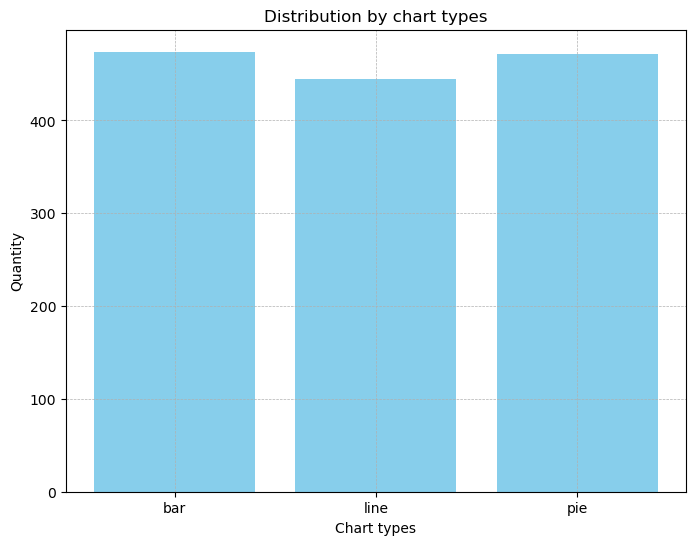

In [15]:
plt.figure(figsize=(8, 6))
plt.bar(
    chart_type_distribution['chart_type'], 
    chart_type_distribution['quantity'], 
    color='skyblue'
)
plt.xlabel('Chart types')
plt.ylabel('Quantity')
plt.title('Distribution by chart types')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [16]:
labels_count_distribution = data.groupby('labels_count').size().reset_index(name='quantity')

# Display the result
print(labels_count_distribution)

    labels_count  quantity
0              2        74
1              3        72
2              4        72
3              5        72
4              6        73
5              7        71
6              8        70
7              9        75
8             10        73
9             11        72
10            12        73
11            13        73
12            14        73
13            15        73
14            16        75
15            17        75
16            18        75
17            19        75
18            20        75


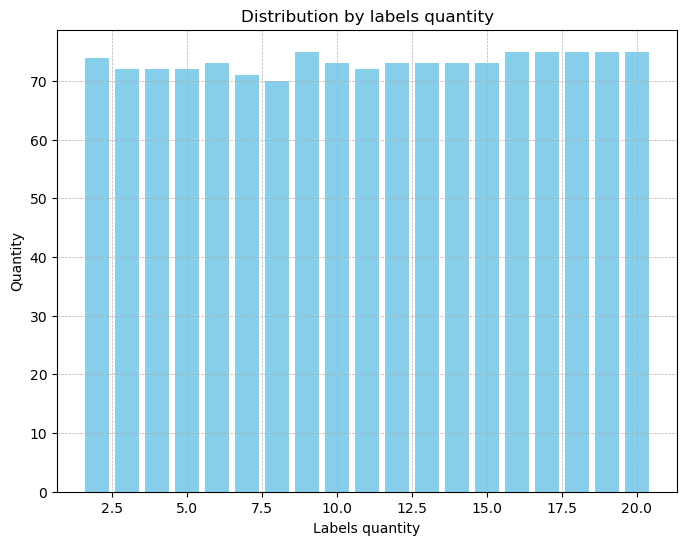

In [17]:
plt.figure(figsize=(8, 6))
plt.bar(
    labels_count_distribution['labels_count'], 
    labels_count_distribution['quantity'], 
    color='skyblue'
)
plt.xlabel('Labels quantity')
plt.ylabel('Quantity')
plt.title('Distribution by labels quantity')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

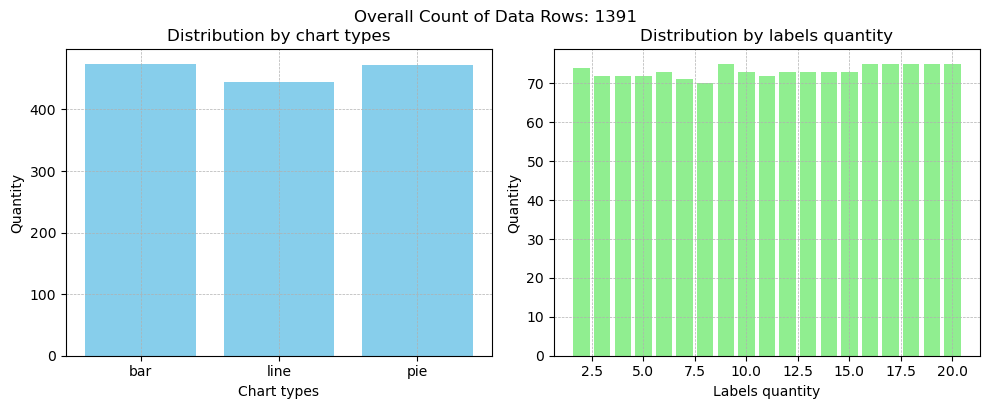

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

plt.figtext(0.5, 0.98, f"Overall Count of Data Rows: {len(data)}", ha="center", fontsize=12)

ax1.bar(chart_type_distribution['chart_type'], chart_type_distribution['quantity'], color='skyblue')
ax1.set_xlabel('Chart types')
ax1.set_ylabel('Quantity')
ax1.set_title('Distribution by chart types')
ax1.grid(True, linestyle='--', linewidth=0.5)

ax2.bar(labels_count_distribution['labels_count'], labels_count_distribution['quantity'], color='lightgreen')
ax2.set_xlabel('Labels quantity')
ax2.set_ylabel('Quantity')
ax2.set_title('Distribution by labels quantity')
ax2.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()

# Display the plots
plt.show()

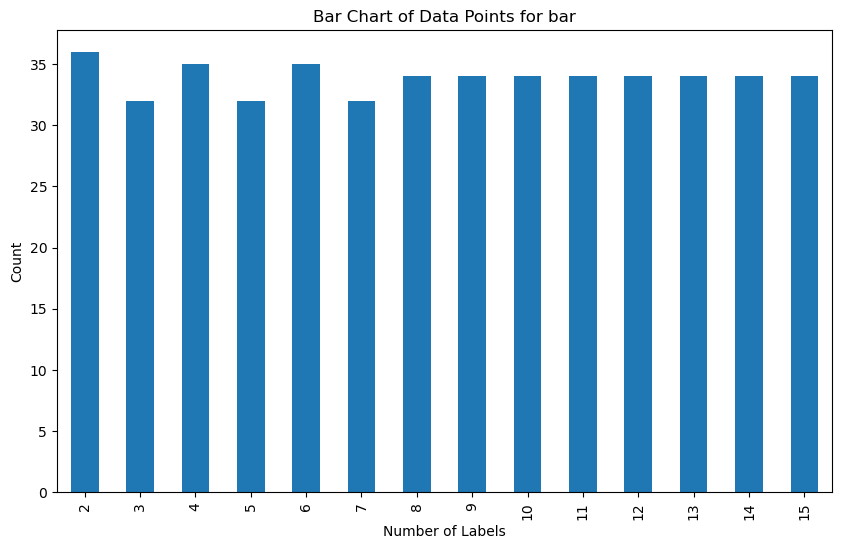

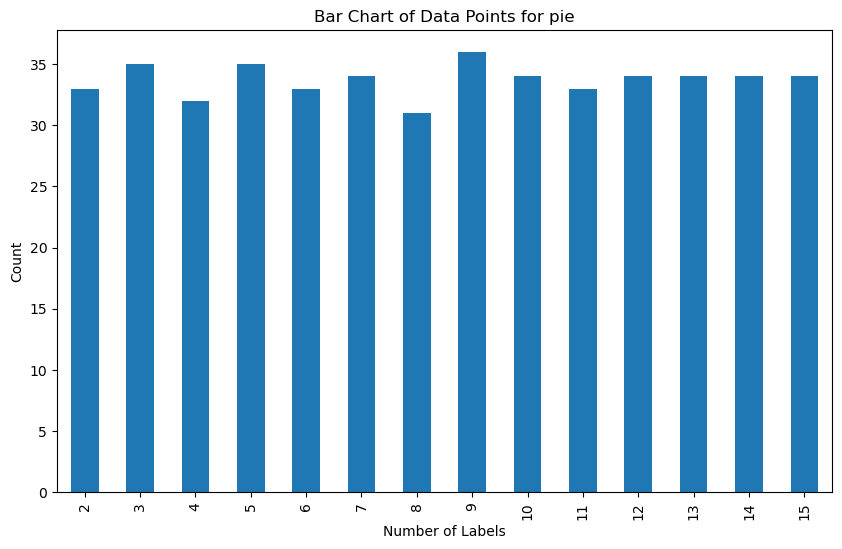

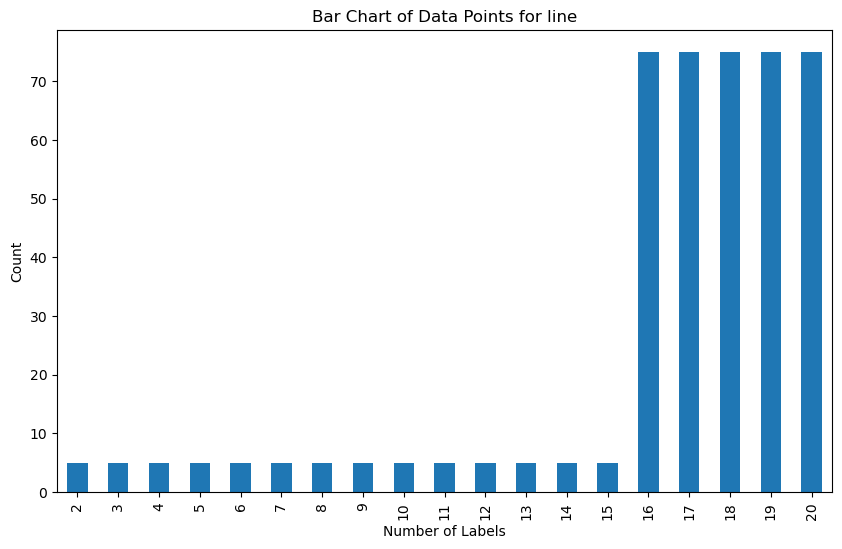

In [19]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
unique_chart_types = data['chart_type'].unique()

for chart_type in unique_chart_types:
    plt.figure(figsize=(10, 6))
    subset = data[data['chart_type'] == chart_type]
    sort_index = subset['labels_count'].value_counts().sort_index()
    sort_index.plot(kind='bar')
    plt.title(f'Bar Chart of Data Points for {chart_type}')
    plt.xlabel('Number of Labels')
    plt.ylabel('Count')
    plt.show()
